### Stock Market Prediction And Forecasting Using Stacked LSTM

In [170]:
### Keras and Tensorflow >2.0

In [267]:
### Data Collection
import pandas_datareader as pdr
#api_key="bedfdf679238524b4fdd2779f5fe8ca942202df7"

In [268]:
df = pdr.get_data_tiingo('TSLA', api_key = "bedfdf679238524b4fdd2779f5fe8ca942202df7")

C:\Users\Krish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [269]:
df. to_csv('TSLA.csv')

In [271]:
df.head

<bound method NDFrame.head of                                     close       high        low     open  \
symbol date                                                                
TSLA   2016-12-16 00:00:00+00:00   202.49   202.5900   197.6000   198.08   
       2016-12-19 00:00:00+00:00   202.73   204.4500   199.8400   202.49   
       2016-12-20 00:00:00+00:00   208.79   209.0000   202.5000   203.05   
       2016-12-21 00:00:00+00:00   207.70   212.2300   207.4100   208.45   
       2016-12-22 00:00:00+00:00   208.45   209.9900   206.5000   208.22   
...                                   ...        ...        ...      ...   
       2021-12-08 00:00:00+00:00  1068.96  1072.3800  1033.0001  1052.71   
       2021-12-09 00:00:00+00:00  1003.80  1062.4900  1002.3600  1060.64   
       2021-12-10 00:00:00+00:00  1017.03  1020.9797   982.5300  1008.75   
       2021-12-13 00:00:00+00:00   966.41  1005.0000   951.4200  1001.09   
       2021-12-14 00:00:00+00:00   958.51   966.4100   930

In [272]:
import pandas as pd

In [273]:
df=pd.read_csv('TSLA.csv')

In [274]:
df1=df.reset_index()['close']

In [275]:
df1

0        202.49
1        202.73
2        208.79
3        207.70
4        208.45
         ...   
1252    1068.96
1253    1003.80
1254    1017.03
1255     966.41
1256     958.51
Name: close, Length: 1257, dtype: float64

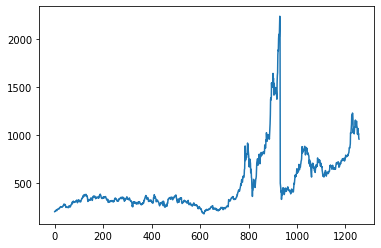

In [276]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [277]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [278]:
import numpy as np

In [279]:
df1

0        202.49
1        202.73
2        208.79
3        207.70
4        208.45
         ...   
1252    1068.96
1253    1003.80
1254    1017.03
1255     966.41
1256     958.51
Name: close, Length: 1257, dtype: float64

In [280]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [281]:
print(df1)

[[0.0114187 ]
 [0.01153521]
 [0.01447727]
 ...
 [0.40686869]
 [0.38229325]
 [0.37845789]]


In [282]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [283]:
training_size,test_size

(817, 440)

In [284]:
#train_data

In [285]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [226]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [228]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [230]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [232]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [234]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [236]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [238]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 253ms/step - loss: 0.0029 - val_loss: 0.0333
Epoch 2/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0011 - val_loss: 0.0151
Epoch 3/100
12/12 [==============================] - 2s 159ms/step - loss: 7.0645e-04 - val_loss: 0.0151
Epoch 4/100
12/12 [==============================] - 2s 159ms/step - loss: 6.0813e-04 - val_loss: 0.0131
Epoch 5/100
12/12 [==============================] - 2s 163ms/step - loss: 4.8773e-04 - val_loss: 0.0125
Epoch 6/100
12/12 [==============================] - 2s 163ms/step - loss: 4.6555e-04 - val_loss: 0.0117
Epoch 7/100
12/12 [==============================] - 2s 163ms/step - loss: 4.7763e-04 - val_loss: 0.0112
Epoch 8/100
12/12 [==============================] - 2s 162ms/step - loss: 4.7112e-04 - val_loss: 0.0110
Epoch 9/100
12/12 [==============================] - 2s 163ms/step - loss: 3.4217e-04 - val_loss: 0.0105
Epoch 10/100
12/12 [==============================] - 2s 162ms/

In [244]:
import tensorflow as tf

In [246]:
tf.__version__

'2.7.0'

In [248]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [249]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [250]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

343.12993134394696

In [251]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

680.0205149754157

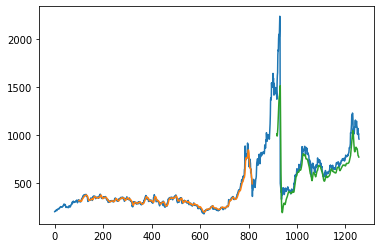

In [252]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [253]:
len(test_data)

440

In [254]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [255]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [256]:
temp_input

[0.22614551068560712,
 0.22721358591694257,
 0.241957878996786,
 0.24673994310071945,
 0.25764887512258583,
 0.257682859334492,
 0.25825573604948093,
 0.2600568992805056,
 0.25251725912476086,
 0.2596345240753866,
 0.25780423151987103,
 0.2567507209507811,
 0.2637563234908582,
 0.26129004068395645,
 0.24623988969695787,
 0.23630679004553884,
 0.24760896794803322,
 0.2400741826797036,
 0.24337065123459783,
 0.2560127780636766,
 0.2570759984075969,
 0.25839167289710546,
 0.25351736593228397,
 0.25874122479099704,
 0.26796065599238744,
 0.27029585683907986,
 0.26950451019040866,
 0.26867917932983126,
 0.2692520560448203,
 0.2786462631931565,
 0.2791074774975968,
 0.2795881113516977,
 0.27056287564691367,
 0.27383021487731696,
 0.2745535931021759,
 0.28005903543096833,
 0.28062220237112695,
 0.28183592422491716,
 0.2676013943236656,
 0.2720727456330287,
 0.2781704842264708,
 0.27899581508704807,
 0.2890697064735068,
 0.2973084504170348,
 0.2906087057841128,
 0.2924292885647981,
 0.28959888

In [257]:
'''
#NOT REQUIRED ( EXTRA PART, NEXT 30 DAYS)
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)'''

'\n#NOT REQUIRED ( EXTRA PART, NEXT 30 DAYS)\n# demonstrate prediction for next 10 days\nfrom numpy import array\n\nlst_output=[]\nn_steps=100\ni=0\nwhile(i<30):\n    \n    if(len(temp_input)>100):\n        #print(temp_input)\n        x_input=np.array(temp_input[1:])\n        print("{} day input {}".format(i,x_input))\n        x_input=x_input.reshape(1,-1)\n        x_input = x_input.reshape((1, n_steps, 1))\n        #print(x_input)\n        yhat = model.predict(x_input, verbose=0)\n        print("{} day output {}".format(i,yhat))\n        temp_input.extend(yhat[0].tolist())\n        temp_input=temp_input[1:]\n        #print(temp_input)\n        lst_output.extend(yhat.tolist())\n        i=i+1\n    else:\n        x_input = x_input.reshape((1, n_steps,1))\n        yhat = model.predict(x_input, verbose=0)\n        print(yhat[0])\n        temp_input.extend(yhat[0].tolist())\n        print(len(temp_input))\n        lst_output.extend(yhat.tolist())\n        i=i+1\n    \n\nprint(lst_output)'

In [258]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)

In [259]:
# import matplotlib.pyplot as plt

In [260]:
#len(df1)

In [261]:
# df3=df1.tolist()
# df3.extend(lst_output)

In [262]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [263]:
# df3=df1.tolist()
# df3.extend(lst_output)
# plt.plot(df3[1200:])

In [264]:
# df3=scaler.inverse_transform(df3).tolist()

In [265]:
# plt.plot(df3)